In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.callbacks import ReduceLROnPlateau

import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [68]:
def label_maker(image,f_type):
    return f_type

images_array=[]
labels_array=[]
dimensions=150
storage=[0,0,0,0,0]
right_pred_storage=[0,0,0,0,0]
Daisy_dir='/Users/mohamedbasuony/desktop/flower_photos/daisy'
Sunflower_dir='/Users/mohamedbasuony/desktop/flower_photos/sunflowers'
Tulip_dir='/Users/mohamedbasuony/desktop/flower_photos/tulips'
Dandelion_dir='/Users/mohamedbasuony/desktop/flower_photos/dandelion'
Rose_dir='/Users/mohamedbasuony/desktop/flower_photos/roses'

In [66]:
def train_d(f_type,direct):
    for img in tqdm(os.listdir(direct)):
        label=label_maker(img,f_type)
        path = os.path.join(direct,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (dimensions,dimensions))
        
        images_array.append(np.array(img))
        labels_array.append(str(label))
        
train_d('Daisy',Daisy_dir)

train_d('Sunflower',Sunflower_dir)

train_d('Tulip',Tulip_dir)

train_d('Dandelion',Dandelion_dir)

train_d('Rose',Rose_dir)

le=LabelEncoder()
labels_array=le.fit_transform(labels_array)
labels_array=to_categorical(labels_array,5)
images_array=np.array(images_array)
images_array=images_array/255

x_train,x_test,y_train,y_test=train_test_split(images_array,labels_array,test_size=0.25,random_state=53)
np.random.seed(53)
rn.seed(53)
tf.random.set_seed(53)

100%|████████████████████████████████████████| 641/641 [00:02<00:00, 274.30it/s]


In [69]:
CNN = Sequential()
CNN.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
CNN.add(MaxPooling2D(pool_size=(2,2)))


CNN.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

CNN.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

CNN.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

CNN.add(Flatten())
CNN.add(Dense(512))
CNN.add(Activation('relu'))
CNN.add(Dense(5, activation = "softmax"))

In [70]:
batch_size=128
epochs=50

red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)


In [71]:
generator = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False) 


generator.fit(x_train)
CNN.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
CNN.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 18, 18, 96)      

In [72]:
run_model = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

/var/folders/c2/vdwmxyv1445gzg0c9mw5s2f40000gn/T/ipykernel_8893/1845686898.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  run_model = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/50
21/21 [==============================] - 39s 2s/step - loss: 1.4433 - accuracy: 0.3552 - val_loss: 1.2433 - val_accuracy: 0.4434
Epoch 2/50
21/21 [==============================] - 40s 2s/step - loss: 1.1956 - accuracy: 0.4695 - val_loss: 1.0742 - val_accuracy: 0.5697
Epoch 3/50
21/21 [==============================] - 41s 2s/step - loss: 1.0566 - accuracy: 0.5903 - val_loss: 0.9814 - val_accuracy: 0.6329
Epoch 4/50
21/21 [==============================] - 40s 2s/step - loss: 0.9695 - accuracy: 0.6235 - val_loss: 0.9338 - val_accuracy: 0.6460
Epoch 5/50
21/21 [==============================] - 40s 2s/step - loss: 0.9074 - accuracy: 0.6486 - val_loss: 0.8523 - val_accuracy: 0.6808
Epoch 6/50
21/21 [==============================] - 41s 2s/step - loss: 0.8748 - accuracy: 0.6654 - val_loss: 0.8724 - val_accuracy: 0.6569
Epoch 7/50
21/21 [==============================] - 41s 2s/step - loss: 0.8635 - accuracy: 0.6620 - val_loss: 0.8118 - val_accuracy: 0.6852
Epoch 8/50
21/21 [==

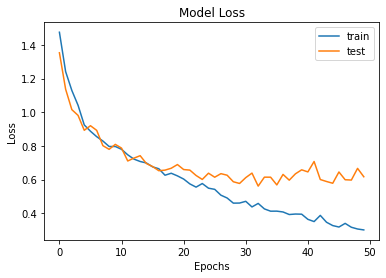

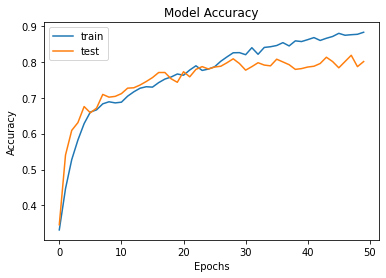

In [74]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [75]:
predictions_all=model.predict(x_test)
highest= np.argmax(predictions_all, axis = 1)
ver_labels=np.argmax(y_test, axis = 1)

storage=[0,0,0,0,0]
right_pred_storage=[0,0,0,0,0]

for i in range(len(ver_labels)):
    storage[ver_labels[i]]=storage[ver_labels[i]]+1
    if(ver_labels[i]==highest[i]):
        right_pred_storage[ver_labels[i]]=right_pred_storage[ver_labels[i]]+1
        
sum_predict=0
sum_test=0
for i in range(5):
    sum_predict=sum_predict+right_pred_storage[i]
    sum_test=sum_test+storage[i]
final= sum_predict/sum_test
print(f"correct Predictions: {sum_predict} out of {sum_test} with an accuracy of {final}")
print(f" \nDiasy's accuracy is {right_pred_storage[0]/storage[0]}")
print(f"Sunflower accuracy is {right_pred_storage[1]/storage[1]}")
print(f"Tulips accuracy is {right_pred_storage[2]/storage[2]}")
print(f"Dandelion accuracy is {right_pred_storage[3]/storage[3]}")
print(f"Roses accuracy is {right_pred_storage[4]/storage[4]}")

    
    

correct Predictions: 728 out of 918 with an accuracy of 0.7930283224400871
 
Diasy's accuracy is 0.8148148148148148
Sunflower accuracy is 0.7737556561085973
Tulips accuracy is 0.7142857142857143
Dandelion accuracy is 0.8607594936708861
Roses accuracy is 0.8086124401913876
